<a href="https://colab.research.google.com/github/priyanshu7466/Python/blob/main/ML/Feature_Engineering/Outliers_Z_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [2]:
matplotlib.rcParams['figure.figsize'] = (10,6)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/2_outliers_z_score/heights.csv")
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


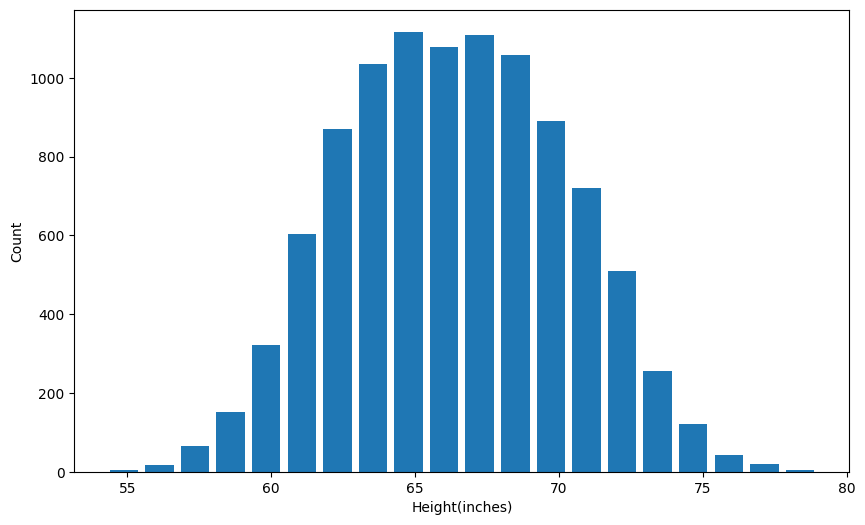

In [5]:
plt.hist(df.height,bins=20,rwidth=0.8)
plt.xlabel('Height(inches)')
plt.ylabel('Count')
plt.show()

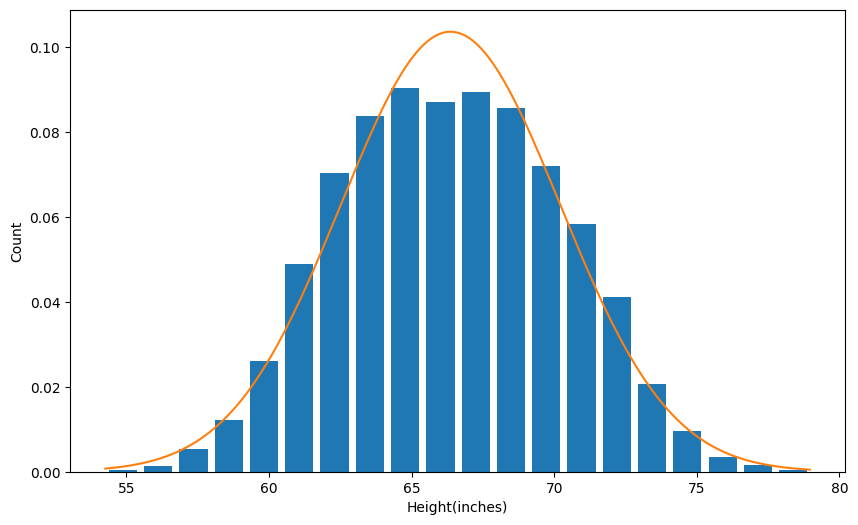

In [8]:
from scipy.stats import norm

plt.hist(df.height,bins=20,rwidth=0.8,density=True)
plt.xlabel('Height(inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(),df.height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.height.mean(),df.height.std()))

In [9]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

In [10]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

77.91014411725271

In [11]:
lower_limit = df.height.mean() - 3*df.height.std()
lower_limit

54.824975392479274

In [12]:
df[(df.height>upper_limit) | (df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [13]:
df2 = df[(df.height<upper_limit) & (df.height>lower_limit)]

In [14]:
df.shape

(10000, 2)

In [15]:
df2.shape

(9993, 2)

In [16]:
df.shape[0] - df2.shape[0]

7

# Z Score

In [18]:
df['z score'] = (df.height - df.height.mean())/df.height.std()
df.head()

,gender,height,z score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [22]:
(73.847017-66.367560)/3.847528

1.9439642804418829

In [19]:
df[(df['z score']>3) | (df['z score']<-3)]

,gender,height,z score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [20]:
df3 = df[(df['z score']<3) & (df['z score']>-3)]

In [21]:
df.shape[0] - df3.shape[0]

7

# Exercise

In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/2_outliers_z_score/Exercise/bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [24]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [25]:
min_threshold, max_threshold = df.price_per_sqft.quantile([0.001,0.999])
min_threshold,max_threshold

(1366.184, 50959.36200000098)

In [26]:
df.shape

(13200, 7)

In [27]:
df2 = df[(df.price_per_sqft>min_threshold) & (df.price_per_sqft<max_threshold)]

In [28]:
df2.shape

(13172, 7)

In [29]:
df2.price_per_sqft.describe()

count    13172.000000
mean      6663.653735
std       4141.020700
min       1379.000000
25%       4271.000000
50%       5438.000000
75%       7311.000000
max      50349.000000
Name: price_per_sqft, dtype: float64

In [30]:
upper_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
upper_limit

23227.73653589432

In [31]:
lower_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
lower_limit

-9900.429065502582

In [32]:
df3 = df2[(df2.price_per_sqft>lower_limit) & (df2.price_per_sqft<upper_limit)]

In [33]:
df3.shape

(13047, 7)

In [39]:
df3.price_per_sqft.describe()

count    13047.000000
mean      6449.328045
std       3487.670005
min       1379.000000
25%       4259.000000
50%       5415.000000
75%       7222.000000
max      23214.000000
Name: price_per_sqft, dtype: float64

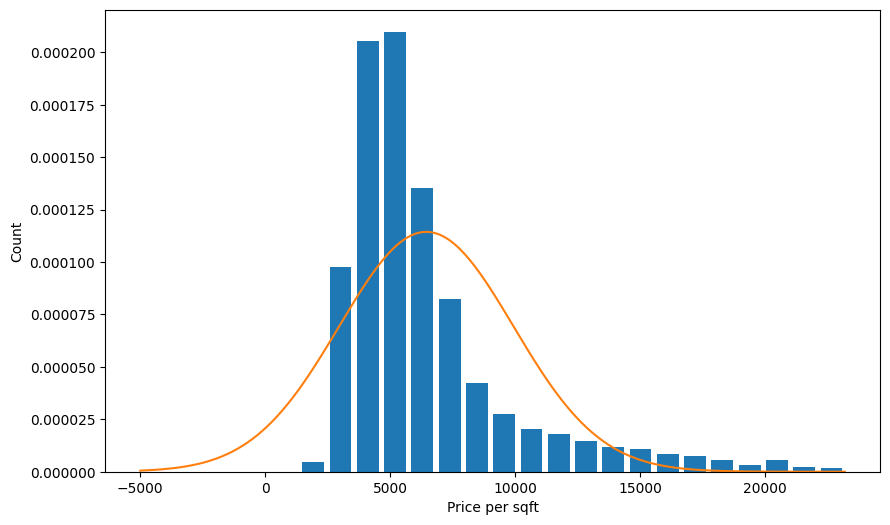

In [43]:
plt.hist(df3.price_per_sqft,bins=20,rwidth=0.8,density=True)
plt.xlabel('Price per sqft')
plt.ylabel('Count')

rng = np.arange(-5000,df3.price_per_sqft.max(),100)
plt.plot(rng,norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

In [38]:
df2['z score'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.head()

<ipython-input-38-f3c9c0f6d495>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['z score'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,z score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [40]:
df4 = df2[(df2['z score']<4) & (df2['z score']>-4)]
df4.shape

(13047, 8)

In [41]:
df4.price_per_sqft.describe()

count    13047.000000
mean      6449.328045
std       3487.670005
min       1379.000000
25%       4259.000000
50%       5415.000000
75%       7222.000000
max      23214.000000
Name: price_per_sqft, dtype: float64